In [101]:
import pandas as pd
import json

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

import datetime
from time import strftime

# Simple example for beginers how to adress ""
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

import json
import pandas as pd

In [102]:
df3=pd.read_csv("New_boulder_dataset.csv")

In [103]:
df3

,Unnamed: 0,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,start_time_hour_int,start_time_minute_int,start_time_second_int,Charge_end_timestamp,end_time_in_hrs_int,end_time_in_mm_int,end_time_in_ss_int,Total_Duration__hh_int,Total_Duration__mm_int,Total_Duration__ss_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute
0,0,1,0.5819,2.732,0.816,2018-01-01 17:49:00,17,0,0,2018-01-01 19:52:00,18,0,0,0,11,0,11,0.183333,0.0529
1,1,1,3.1740,2.732,0.816,2018-01-01 17:49:00,18,0,0,2018-01-01 19:52:00,19,0,0,1,0,0,60,1.000000,0.0529
2,2,1,2.7508,2.732,0.816,2018-01-01 17:49:00,19,0,0,2018-01-01 19:52:00,20,0,0,0,52,0,52,0.866667,0.0529
3,3,2,0.8272,1.042,0.311,2018-01-02 08:52:00,8,0,0,2018-01-02 09:16:00,9,0,0,0,8,0,8,0.133333,0.1034
4,4,2,1.6544,1.042,0.311,2018-01-02 08:52:00,9,0,0,2018-01-02 09:16:00,10,0,0,0,16,0,16,0.266667,0.1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119897,119897,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,3,0,0,2021-05-21 22:13:00,4,0,0,1,0,0,60,1.000000,0.0246
119898,119898,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,4,0,0,2021-05-21 22:13:00,5,0,0,1,0,0,60,1.000000,0.0246
119899,119899,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,5,0,0,2021-05-21 22:13:00,6,0,0,1,0,0,60,1.000000,0.0246
119900,119900,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,6,0,0,2021-05-21 22:13:00,7,0,0,1,0,0,60,1.000000,0.0246


In [104]:
df3.drop(df3.columns[0], axis=1, inplace=True)

In [105]:
df3

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,start_time_hour_int,start_time_minute_int,start_time_second_int,Charge_end_timestamp,end_time_in_hrs_int,end_time_in_mm_int,end_time_in_ss_int,Total_Duration__hh_int,Total_Duration__mm_int,Total_Duration__ss_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute
0,1,0.5819,2.732,0.816,2018-01-01 17:49:00,17,0,0,2018-01-01 19:52:00,18,0,0,0,11,0,11,0.183333,0.0529
1,1,3.1740,2.732,0.816,2018-01-01 17:49:00,18,0,0,2018-01-01 19:52:00,19,0,0,1,0,0,60,1.000000,0.0529
2,1,2.7508,2.732,0.816,2018-01-01 17:49:00,19,0,0,2018-01-01 19:52:00,20,0,0,0,52,0,52,0.866667,0.0529
3,2,0.8272,1.042,0.311,2018-01-02 08:52:00,8,0,0,2018-01-02 09:16:00,9,0,0,0,8,0,8,0.133333,0.1034
4,2,1.6544,1.042,0.311,2018-01-02 08:52:00,9,0,0,2018-01-02 09:16:00,10,0,0,0,16,0,16,0.266667,0.1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119897,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,3,0,0,2021-05-21 22:13:00,4,0,0,1,0,0,60,1.000000,0.0246
119898,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,4,0,0,2021-05-21 22:13:00,5,0,0,1,0,0,60,1.000000,0.0246
119899,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,5,0,0,2021-05-21 22:13:00,6,0,0,1,0,0,60,1.000000,0.0246
119900,25543,1.4760,9.350,1.653,2021-05-21 22:13:00,6,0,0,2021-05-21 22:13:00,7,0,0,1,0,0,60,1.000000,0.0246


In [106]:
df3.columns

Index(['ObjectId', 'Energy__kWh_', 'GHG_Savings__kg_',
       'Gasoline_Savings__gallons_', 'Charge_start_timestamp',
       'start_time_hour_int', 'start_time_minute_int', 'start_time_second_int',
       'Charge_end_timestamp', 'end_time_in_hrs_int', 'end_time_in_mm_int',
       'end_time_in_ss_int', 'Total_Duration__hh_int',
       'Total_Duration__mm_int', 'Total_Duration__ss_int',
       'charge_duration_in_minutes', 'charge_duration_in_hours',
       'Energy__kWh_per_minute'],
      dtype='object')

In [107]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119902 entries, 0 to 119901
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ObjectId                    119902 non-null  int64  
 1   Energy__kWh_                119687 non-null  float64
 2   GHG_Savings__kg_            119902 non-null  float64
 3   Gasoline_Savings__gallons_  119902 non-null  float64
 4   Charge_start_timestamp      119902 non-null  object 
 5   start_time_hour_int         119902 non-null  int64  
 6   start_time_minute_int       119902 non-null  int64  
 7   start_time_second_int       119902 non-null  int64  
 8   Charge_end_timestamp        119902 non-null  object 
 9   end_time_in_hrs_int         119902 non-null  int64  
 10  end_time_in_mm_int          119902 non-null  int64  
 11  end_time_in_ss_int          119902 non-null  int64  
 12  Total_Duration__hh_int      119902 non-null  int64  
 13  Total_Duration

In [108]:
df3.isnull().sum()

ObjectId                        0
Energy__kWh_                  215
GHG_Savings__kg_                0
Gasoline_Savings__gallons_      0
Charge_start_timestamp          0
start_time_hour_int             0
start_time_minute_int           0
start_time_second_int           0
Charge_end_timestamp            0
end_time_in_hrs_int             0
end_time_in_mm_int              0
end_time_in_ss_int              0
Total_Duration__hh_int          0
Total_Duration__mm_int          0
Total_Duration__ss_int          0
charge_duration_in_minutes      0
charge_duration_in_hours        0
Energy__kWh_per_minute        205
dtype: int64

In [109]:
# get tme and date from timestamp
df3['Charge_start_timestamp'] = pd.to_datetime(df3['Charge_start_timestamp'])
df3['Charge_end_timestamp'] = pd.to_datetime(df3['Charge_end_timestamp'])

df3['Start_date_month'] = df3['Charge_start_timestamp'].dt.month
df3['End_date_month'] = df3['Charge_end_timestamp'].dt.month

df3['Start_date_day'] = df3['Charge_start_timestamp'].dt.day
df3['End_date_day'] = df3['Charge_end_timestamp'].dt.day

df3['Start_date_year'] = df3['Charge_start_timestamp'].dt.year
df3['End_date_year'] = df3['Charge_end_timestamp'].dt.year

df3['startdayOfWeek'] = df3['Charge_start_timestamp'].dt.dayofweek
df3['enddayOfWeek'] = df3['Charge_end_timestamp'].dt.dayofweek


In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119902 entries, 0 to 119901
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ObjectId                    119902 non-null  int64         
 1   Energy__kWh_                119687 non-null  float64       
 2   GHG_Savings__kg_            119902 non-null  float64       
 3   Gasoline_Savings__gallons_  119902 non-null  float64       
 4   Charge_start_timestamp      119902 non-null  datetime64[ns]
 5   start_time_hour_int         119902 non-null  int64         
 6   start_time_minute_int       119902 non-null  int64         
 7   start_time_second_int       119902 non-null  int64         
 8   Charge_end_timestamp        119902 non-null  datetime64[ns]
 9   end_time_in_hrs_int         119902 non-null  int64         
 10  end_time_in_mm_int          119902 non-null  int64         
 11  end_time_in_ss_int          119902 non-

In [111]:
newdf=df3.drop(columns=['Charge_start_timestamp','Charge_end_timestamp'])

In [112]:
# Print Unique Values of columns

print("Unique Values in `start_time_hour_int` => {}".format(newdf['start_time_hour_int'].unique()))
print('\n')

Unique Values in `start_time_hour_int` => [17 18 19  8  9 10 11 14 15 12 13 16 21  7 20  6 22  5 23  0  1  2  3  4]




In [113]:
newdf

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,start_time_hour_int,start_time_minute_int,start_time_second_int,end_time_in_hrs_int,end_time_in_mm_int,end_time_in_ss_int,...,charge_duration_in_hours,Energy__kWh_per_minute,Start_date_month,End_date_month,Start_date_day,End_date_day,Start_date_year,End_date_year,startdayOfWeek,enddayOfWeek
0,1,0.5819,2.732,0.816,17,0,0,18,0,0,...,0.183333,0.0529,1,1,1,1,2018,2018,0,0
1,1,3.1740,2.732,0.816,18,0,0,19,0,0,...,1.000000,0.0529,1,1,1,1,2018,2018,0,0
2,1,2.7508,2.732,0.816,19,0,0,20,0,0,...,0.866667,0.0529,1,1,1,1,2018,2018,0,0
3,2,0.8272,1.042,0.311,8,0,0,9,0,0,...,0.133333,0.1034,1,1,2,2,2018,2018,1,1
4,2,1.6544,1.042,0.311,9,0,0,10,0,0,...,0.266667,0.1034,1,1,2,2,2018,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119897,25543,1.4760,9.350,1.653,3,0,0,4,0,0,...,1.000000,0.0246,5,5,21,21,2021,2021,4,4
119898,25543,1.4760,9.350,1.653,4,0,0,5,0,0,...,1.000000,0.0246,5,5,21,21,2021,2021,4,4
119899,25543,1.4760,9.350,1.653,5,0,0,6,0,0,...,1.000000,0.0246,5,5,21,21,2021,2021,4,4
119900,25543,1.4760,9.350,1.653,6,0,0,7,0,0,...,1.000000,0.0246,5,5,21,21,2021,2021,4,4


# for entire dataset
import pylab as pl


newdf=newdf.replace([np.inf, -np.inf], np.nan)

newdf['Energy__kWh_'].fillna(newdf['Energy__kWh_'].mean(), inplace=True)
newdf['Energy__kWh_per_minute'].fillna(newdf['Energy__kWh_per_minute'].mean(), inplace=True)


print("Unique Values Energy between=> {}".format(newdf.Energy__kWh_.unique()))
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
sns.boxplot(x=newdf.Energy__kWh_)




Unique Values Energy between df_14_to_15=> [1.8003 2.3759 3.27   ... 1.2862 0.2601 0.9212]
All Records with charging between df_14_to_15: 


,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,start_time_hour_int,start_time_minute_int,start_time_second_int,end_time_in_hrs_int,end_time_in_mm_int,end_time_in_ss_int,...,charge_duration_in_hours,Energy__kWh_per_minute,Start_date_month,End_date_month,Start_date_day,End_date_day,Start_date_year,End_date_year,startdayOfWeek,enddayOfWeek
8,5,1.8003,0.756,0.226,14,0,0,15,0,0,...,0.283333,0.1059,1,1,3,3,2018,2018,2,2
9,6,2.3759,1.042,0.311,14,0,0,15,0,0,...,0.383333,0.1033,1,1,3,3,2018,2018,2,2
14,9,3.2700,5.926,1.771,14,0,0,15,0,0,...,1.000000,0.0545,1,1,4,4,2018,2018,3,3
20,13,0.6528,0.274,0.082,14,0,0,15,0,0,...,0.400000,0.0272,1,1,5,5,2018,2018,4,4
35,18,1.5840,4.294,1.283,14,0,0,15,0,0,...,1.000000,0.0264,1,1,6,6,2018,2018,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119681,25142,0.1980,8.958,1.583,14,0,0,15,0,0,...,1.000000,0.0033,5,5,8,8,2021,2021,5,5
119705,25142,0.1980,8.958,1.583,14,0,0,15,0,0,...,1.000000,0.0033,5,5,9,9,2021,2021,6,6
119742,25280,0.9212,14.276,2.523,14,0,0,15,0,0,...,0.783333,0.0196,5,5,24,24,2021,2021,0,0
119785,25374,0.0000,0.005,0.001,14,0,0,15,0,0,...,1.000000,0.0000,5,5,25,25,2021,2021,1,1


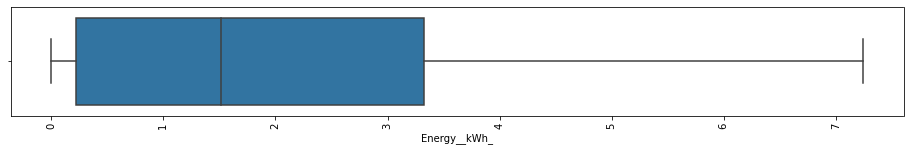

In [114]:
# for 14_to_15
import pylab as pl

# gathering all records for start time between df_14_to_15
df_14_to_15=newdf[newdf['start_time_hour_int'] ==14]


df_14_to_15=df_14_to_15.replace([np.inf, -np.inf], np.nan)

df_14_to_15['Energy__kWh_'].fillna(df_14_to_15['Energy__kWh_'].mean(), inplace=True)
df_14_to_15['Energy__kWh_per_minute'].fillna(df_14_to_15['Energy__kWh_per_minute'].mean(), inplace=True)


print("Unique Values Energy between df_14_to_15=> {}".format(df_14_to_15.Energy__kWh_.unique()))
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
sns.boxplot(x=df_14_to_15.Energy__kWh_)


print("All Records with charging between df_14_to_15: ")

# check all records between df_14_to_15
df_14_to_15



<AxesSubplot:xlabel='start_time_hour_int', ylabel='count'>

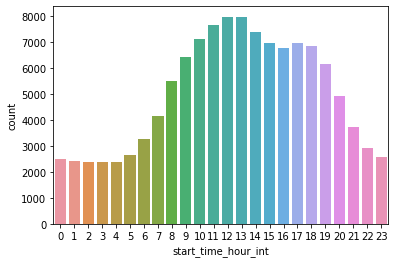

In [115]:
#sns.distplot(df['Gender'],kde=False, bins=10)
sns.countplot(x='start_time_hour_int', data=newdf)

In [116]:
# initialize a dataframe
t1 = pd.Series([0,0,0,0])
metrics_df= pd.DataFrame([list(t1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])

In [117]:
# Get the Dependent and Independent Features.
X = df_14_to_15.drop(['Energy__kWh_'], axis=1)
y = df_14_to_15['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
print("Mean squared error: %.2f" % MSE)

index = df_14_to_15.index
number_of_rows = len(index)

s1 = pd.Series(["14:00 to 15:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


R2 score : 0.60
Mean squared error: 1.63


Unique Values Energy between df_15_to_16=> [0.1033 3.27   1.584  ... 0.3492 0.232  0.1914]
All Records with charging between df_15_to_16: 


c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


R2 score : 0.62
Mean squared error: 1.54


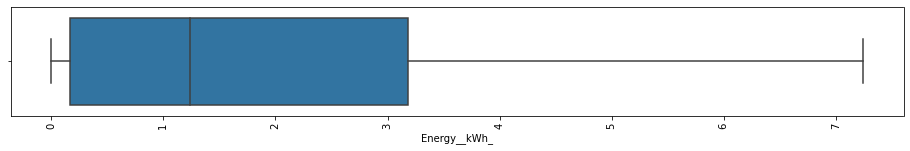

In [118]:
# for 15_to_16
import pylab as pl

# gathering all records for start time between 15_to_16
df_15_to_16=newdf[newdf['start_time_hour_int'] ==15]


df_15_to_16=df_15_to_16.replace([np.inf, -np.inf], np.nan)

df_15_to_16['Energy__kWh_'].fillna(df_15_to_16['Energy__kWh_'].mean(), inplace=True)
df_15_to_16['Energy__kWh_per_minute'].fillna(df_15_to_16['Energy__kWh_per_minute'].mean(), inplace=True)


print("Unique Values Energy between df_15_to_16=> {}".format(df_15_to_16.Energy__kWh_.unique()))
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
sns.boxplot(x=df_15_to_16.Energy__kWh_)


print("All Records with charging between df_15_to_16: ")

# check all records between df_15_to_16
df_15_to_16

# Get the Dependent and Independent Features.
X = df_15_to_16.drop(['Energy__kWh_'], axis=1)
y = df_15_to_16['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
print("Mean squared error: %.2f" % MSE)

index = df_15_to_16.index
number_of_rows = len(index)

s1 = pd.Series(["15:00 to 16:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)

In [119]:

# for 16_to_17
import pylab as pl

# gathering all records for start time between df_16_to_17
df_16_to_17=newdf[newdf['start_time_hour_int'] ==16]


df_16_to_17=df_16_to_17.replace([np.inf, -np.inf], np.nan)

df_16_to_17['Energy__kWh_'].fillna(df_16_to_17['Energy__kWh_'].mean(), inplace=True)
df_16_to_17['Energy__kWh_per_minute'].fillna(df_16_to_17['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_16_to_17.drop(['Energy__kWh_'], axis=1)
y = df_16_to_17['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_16_to_17.index
number_of_rows = len(index)

s1 = pd.Series(["16:00 to 17:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [120]:

# for 17_to_18
import pylab as pl

# gathering all records for start time between 17_to_18
df_17_to_18=newdf[newdf['start_time_hour_int'] ==17]


df_17_to_18=df_17_to_18.replace([np.inf, -np.inf], np.nan)

df_17_to_18['Energy__kWh_'].fillna(df_17_to_18['Energy__kWh_'].mean(), inplace=True)
df_17_to_18['Energy__kWh_per_minute'].fillna(df_17_to_18['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_17_to_18.drop(['Energy__kWh_'], axis=1)
y = df_17_to_18['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_17_to_18.index
number_of_rows = len(index)

s1 = pd.Series(["17:00 to 18:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [121]:

# for 18_to_19
import pylab as pl

# gathering all records for start time between df_18_to_19
df_18_to_19=newdf[newdf['start_time_hour_int'] ==18]


df_18_to_19=df_18_to_19.replace([np.inf, -np.inf], np.nan)

df_18_to_19['Energy__kWh_'].fillna(df_18_to_19['Energy__kWh_'].mean(), inplace=True)
df_18_to_19['Energy__kWh_per_minute'].fillna(df_18_to_19['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_18_to_19.drop(['Energy__kWh_'], axis=1)
y = df_18_to_19['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_18_to_19.index
number_of_rows = len(index)

s1 = pd.Series(["18:00 to 19:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [122]:

# for 19_to_20
import pylab as pl

# gathering all records for start time between df_19_to_20
df_19_to_20=newdf[newdf['start_time_hour_int'] ==19]


df_19_to_20=df_19_to_20.replace([np.inf, -np.inf], np.nan)

df_19_to_20['Energy__kWh_'].fillna(df_19_to_20['Energy__kWh_'].mean(), inplace=True)
df_19_to_20['Energy__kWh_per_minute'].fillna(df_19_to_20['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_19_to_20.drop(['Energy__kWh_'], axis=1)
y = df_19_to_20['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_19_to_20.index
number_of_rows = len(index)

s1 = pd.Series(["19:00 to 20:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [123]:

# for 20_to_21
import pylab as pl

# gathering all records for start time between df_20_to_21
df_20_to_21=newdf[newdf['start_time_hour_int'] ==20]


df_20_to_21=df_20_to_21.replace([np.inf, -np.inf], np.nan)

df_20_to_21['Energy__kWh_'].fillna(df_20_to_21['Energy__kWh_'].mean(), inplace=True)
df_20_to_21['Energy__kWh_per_minute'].fillna(df_20_to_21['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_20_to_21.drop(['Energy__kWh_'], axis=1)
y = df_20_to_21['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_20_to_21.index
number_of_rows = len(index)

s1 = pd.Series(["20:00 to 21:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [124]:

# for 21_to_22
import pylab as pl

# gathering all records for start time between df_21_to_22
df_21_to_22=newdf[newdf['start_time_hour_int'] ==21]


df_21_to_22=df_21_to_22.replace([np.inf, -np.inf], np.nan)

df_21_to_22['Energy__kWh_'].fillna(df_21_to_22['Energy__kWh_'].mean(), inplace=True)
df_21_to_22['Energy__kWh_per_minute'].fillna(df_21_to_22['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_21_to_22.drop(['Energy__kWh_'], axis=1)
y = df_21_to_22['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_21_to_22.index
number_of_rows = len(index)

s1 = pd.Series(["21:00 to 22:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [125]:

# for 22_to_23
import pylab as pl

# gathering all records for start time between df_22_to_23
df_22_to_23=newdf[newdf['start_time_hour_int'] ==22]


df_22_to_23=df_22_to_23.replace([np.inf, -np.inf], np.nan)

df_22_to_23['Energy__kWh_'].fillna(df_22_to_23['Energy__kWh_'].mean(), inplace=True)
df_22_to_23['Energy__kWh_per_minute'].fillna(df_22_to_23['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_22_to_23.drop(['Energy__kWh_'], axis=1)
y = df_22_to_23['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_22_to_23.index
number_of_rows = len(index)

s1 = pd.Series(["22:00 to 23:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [126]:

# for 23_to_00
import pylab as pl

# gathering all records for start time between df_23_to_00
df_23_to_00=newdf[newdf['start_time_hour_int'] ==23]


df_23_to_00=df_23_to_00.replace([np.inf, -np.inf], np.nan)

df_23_to_00['Energy__kWh_'].fillna(df_23_to_00['Energy__kWh_'].mean(), inplace=True)
df_23_to_00['Energy__kWh_per_minute'].fillna(df_23_to_00['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_23_to_00.drop(['Energy__kWh_'], axis=1)
y = df_23_to_00['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_23_to_00.index
number_of_rows = len(index)

s1 = pd.Series(["23:00 to 00:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [127]:

# for 0_to_1
import pylab as pl

# gathering all records for start time between 0_to_1
df_0_to_1=newdf[newdf['start_time_hour_int'] ==0]


df_0_to_1=df_0_to_1.replace([np.inf, -np.inf], np.nan)

df_0_to_1['Energy__kWh_'].fillna(df_0_to_1['Energy__kWh_'].mean(), inplace=True)
df_0_to_1['Energy__kWh_per_minute'].fillna(df_0_to_1['Energy__kWh_per_minute'].mean(), inplace=True)


# Get the Dependent and Independent Features.
X = df_0_to_1.drop(['Energy__kWh_'], axis=1)
y = df_0_to_1['Energy__kWh_']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_predict=xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
R2_score=r2_score(y_test,xgb_predict)
#print("R2 score : %.2f" % R2_score )

MSE=mean_squared_error(y_test,xgb_predict)
#print("Mean squared error: %.2f" % MSE)

index = df_0_to_1.index
number_of_rows = len(index)

s1 = pd.Series(["00:00 to 1:00",number_of_rows, R2_score, MSE ])
d1 = pd.DataFrame([list(s1)],  columns =  ["Dataset_name","total records", "R2_score", "MSE"])
                  
metrics_df = metrics_df.append(d1)
                  

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [128]:
metrics_df

,Dataset_name,total records,R2_score,MSE
0,0,0,0.000000,0.000000
0,14:00 to 15:00,7378,0.603288,1.629205
0,15:00 to 16:00,6962,0.615334,1.537162
0,16:00 to 17:00,6767,0.638234,1.473401
0,17:00 to 18:00,6950,0.539587,1.569973
0,18:00 to 19:00,6835,0.686473,1.206986
0,19:00 to 20:00,6150,0.730631,1.107823
0,20:00 to 21:00,4927,0.724191,1.058142
0,21:00 to 22:00,3721,0.726754,0.837825
0,22:00 to 23:00,2918,0.690843,0.646676
